Implementation of Personalized Crowd Emotional Contagion Coupling the Virtual and Physical Cyberspace

X. Hong, G. Zhang, D. Lu, H. Liu, L. Zhu and M. Xu, "Personalized Crowd Emotional Contagion Coupling the Virtual and Physical Cyberspace," in IEEE Transactions on Systems, Man, and Cybernetics: Systems, vol. 52, no. 3, pp. 1638-1652, March 2022, doi: 10.1109/TSMC.2020.3034395.

In [ ]:
# Installing required packages
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import random as random

"""def get_vertices(G):
  return G.number_of_edges()

def get_diameter(G):
  return nx.diameter(G)
"""


def get_degree(G):
  dict0=dict(nx.degree(G))
  result=dict0.items()
  data = list(result)
  arr0 = np.array(data)
  arr1=[row[1] for row in arr0]
  print("degree Standard Deviation")
  print(np.std(arr1))
  print("degree Mean:")
  print(np.mean(arr1))
  print("degree Mean 2m/n:")
  n=G.number_of_nodes()
  m=G.number_of_edges()
  print((2*m)/n)

def get_elements(G):
  print("Number of Edges:")
  print(G.number_of_edges())
  print("Diameter:")
  print(nx.diameter(G))
  print("Radius:")
  print(nx.radius(G))





# Barabási-Albert model

In [ ]:
def generate_ba(n, m0, m):
    """ Function to generate graph networks using
    Watts-Strogatz Model
    Returns
    -------
    random BA graph
    """
    return nx.barabasi_albert_graph(n,m0, m)

def plot_ba(G, n):
    """ Plots the Watts-Strogatz graph

    Parameters
    ----------
    G: graph
    n: int
      Number of nodes

    Returns
    -------
    None
    """
    # Put the nodes in a circular shape
    pos = nx.circular_layout(G)
    pos = nx.spring_layout(G, iterations=400, seed=42)
    nx.draw(G, pos, node_color=range(400), node_size=50, cmap=plt.cm.Blues)
    plt.show()

#Here BA-Scale free network with N nodes were generated

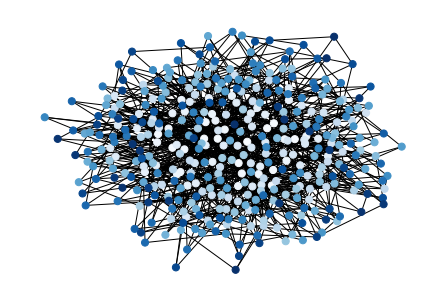

Number of Edges:
1191
Diameter:
5
Radius:
3
degree Standard Deviation
6.188535771893057
degree Mean:
5.955
degree Mean 2m/n:
5.955


In [ ]:
m=3
m0=3
n=400

G_ba = generate_ba(n, m0, m)
plot_ba(G_ba, n)
get_elements(G_ba)
get_degree(G_ba)


Line2

In [ ]:
r=0.07
k=10**(-8)
I_vir=3*1e-3
I_phy=3*1e-4
print(k)
Cycle=0
Tcycle=0
W=10
T=3
C_PI=8
C_VI=24
C_PS=90
C_VS=278
C_R=0
C_PI_arr=[]
C_VI_arr=[]
C_PS_arr=[]
C_VS_arr=[]
C_R_arr=[]
n=400
C=[None]*n
nodes=list(G_ba.nodes)

# H:
P_C_VI = np.empty(T)
P_C_PI = np.empty(T)

#Line 6 algorithm 1 Generate categories randomly


while Tcycle < T:
  #Line 5 algorithm 1
  gi=random.sample(range(400), 400)
  t=0

#INITIALIZING BASED ON TABLE I AND SETTING DEFAULT VALUE

  def for_each(arr, s):
    for i in arr:
      G_ba.nodes[i]['state'] = s
      if G_ba.nodes[i]['state']=='pi':
        G_ba.nodes[i]['S_vir']=0
        G_ba.nodes[i]['I_vir']=0
        G_ba.nodes[i]['I_phy']=I_phy
        G_ba.nodes[i]['S_phy']=0
        G_ba.nodes[i]['r']=r

      if G_ba.nodes[i]['state']=='ps':
        G_ba.nodes[i]['S_vir']=0
        G_ba.nodes[i]['I_vir']=0
        G_ba.nodes[i]['I_phy']=0
        G_ba.nodes[i]['S_phy']=0
        G_ba.nodes[i]['r']=0
      if G_ba.nodes[i]['state']=='vs':
        G_ba.nodes[i]['S_vir']=0
        G_ba.nodes[i]['I_vir']=0
        G_ba.nodes[i]['I_phy']=0
        G_ba.nodes[i]['S_phy']=0
        G_ba.nodes[i]['r']=0
      if G_ba.nodes[i]['state']=='vi':
        G_ba.nodes[i]['S_vir']=0
        G_ba.nodes[i]['I_vir']=I_vir
        G_ba.nodes[i]['I_phy']=0
        G_ba.nodes[i]['S_phy']=0
        G_ba.nodes[i]['r']=r
      if G_ba.nodes[i]['state']=='r':
        G_ba.nodes[i]['S_vir']=0
        G_ba.nodes[i]['I_vir']=0
        G_ba.nodes[i]['I_phy']=0
        G_ba.nodes[i]['S_phy']=0
        G_ba.nodes[i]['r']=0



  C_PI_arr=gi[0:8]
  C_VI_arr=gi[8:32]
  C_PS_arr=gi[32:122]
  C_VS_arr=gi[122:400]

  for_each(C_PI_arr, 'pi')
  for_each(C_VI_arr, 'vi')
  for_each(C_PS_arr, 'ps')
  for_each(C_VS_arr, 'vs')



  while Cycle<W:
    for i in range (n):
# Line 8 algorithm 1 calculating S_vir and S_phy
      rand=random.uniform(0, 1)
      if 0<rand<=0.2:
        G_ba.nodes[i]['C']="anxious"
        G_ba.nodes[i]['S_vir'] = rand

      if 0.4<rand<=0.6:
        G_ba.nodes[i]['C']="panic"
        G_ba.nodes[i]['S_vir'] = rand

      if 0.8<rand<=0.9:
        G_ba.nodes[i]['C']="hysterical"
        G_ba.nodes[i]['S_vir'] = rand

      if 0.2<rand<=0.4:
        G_ba.nodes[i]['C']="anxious"
        G_ba.nodes[i]['S_phy'] = rand

      if 0.6<rand<=0.8:
        G_ba.nodes[i]['C']="panic"
        G_ba.nodes[i]['S_phy'] = rand

      if 0.9<rand<=1:
        G_ba.nodes[i]['C']="hysterical"
        G_ba.nodes[i]['S_phy'] = rand



#Line 9 algorithm 1 calculating L(i,j)
    for i,j in G_ba.edges:
      if (G_ba.nodes[i]['state']=='vs' or G_ba.nodes[i]['state']=='ps'):
        if(G_ba.nodes[j]['state']=='vi'):
          G_ba.edges[i, j]['L_vir']=G_ba.nodes[i]['S_vir']*I_vir

        if(G_ba.nodes[j]['state']=='pi'):
          G_ba.edges[i, j]['L_phy']=G_ba.nodes[i]['S_phy']*I_phy


    p=len(C_VI_arr)
    q=len(C_PI_arr)


    t0=1
    t1=1
#Line 10 algorithm 1 calculating P^vir_S-to-I and P^phy_S-to-I and P_I-to-R
    for i,j in G_ba.edges:
      for p in C_VI_arr:
        if G_ba.has_edge(i, p):
          L_vir=G_ba.edges[i,p].get('L_vir',0)
          r0=1-L_vir
          t0=t0*r0
      for q in C_PI_arr:
        if G_ba.has_edge(i, q):
          L_phy=G_ba.edges[i,q].get('L_phy',0)
          r1=1-L_phy
          t1=t1*r1
      t2=t0*t1
      fr=1-t2
      G_ba.edges[i,j]['P_vir_i']=fr
      G_ba.edges[i,j]['P_phy_i']=fr
      G_ba.edges[i,j]['P_i_r']=r


#Line 11 and 12 algorithm 1 Generating P_rand and changing State(i,t)

    for i, j in G_ba.edges:
      G_ba.nodes[i]['P_rand']=random.random()
      if G_ba.nodes[i]['state']=='vs':
        if 0<=G_ba.nodes[i]['P_rand']<G_ba.edges[i,j]['P_vir_i']:
          G_ba.nodes[i]['state']='vi'
        if G_ba.edges[i,j]['P_vir_i']<=G_ba.nodes[i]['P_rand']<=1:
          G_ba.nodes[i]['state']='vs'

      if G_ba.nodes[i]['state']=='ps':
        if 0<=G_ba.nodes[i]['P_rand']<G_ba.edges[i,j]['P_phy_i']:
          G_ba.nodes[i]['state']='pi'
        if G_ba.edges[i,j]['P_phy_i']<=G_ba.nodes[i]['P_rand']<=1:
          G_ba.nodes[i]['state']='ps'

      if G_ba.nodes[i]['state']=='pi' :
        if 0<=G_ba.nodes[i]['P_rand']<G_ba.edges[i,j]['P_i_r']:
          G_ba.nodes[i]['state']='r'
        if G_ba.edges[i,j]['P_i_r']<=G_ba.nodes[i]['P_rand']<=1:
          G_ba.nodes[i]['state']='pi'

      if G_ba.nodes[i]['state']=='vi' :
        if 0<=G_ba.nodes[i]['P_rand']<G_ba.edges[i,j]['P_i_r']:
          G_ba.nodes[i]['state']='r'
        if G_ba.edges[i,j]['P_i_r']<=G_ba.nodes[i]['P_rand']<=1:
          G_ba.nodes[i]['state']='vi'


    C_PI_arr=nx.subgraph_view(G_ba, filter_node=lambda n:G_ba.nodes[n]['state']=='pi').nodes()
    C_VI_arr=nx.subgraph_view(G_ba, filter_node=lambda n:G_ba.nodes[n]['state'] == 'vi').nodes()
    C_PS_arr=nx.subgraph_view(G_ba, filter_node=lambda n:G_ba.nodes[n]['state']=='ps').nodes()
    C_VS_arr=nx.subgraph_view(G_ba, filter_node=lambda n:G_ba.nodes[n]['state']=='vs').nodes()
    C_R_arr=nx.subgraph_view(G_ba, filter_node=lambda n:G_ba.nodes[n]['state']=='r').nodes()
    Cycle=Cycle+1

  # H: line 14
    P_C_VI[Tcycle] = float(len(C_VI_arr))/n
    P_C_PI[Tcycle] = float(len(C_PI_arr))/n

    print('P_C_VI :')
    print(P_C_VI[Tcycle])
    print("P_C_PI :")
    print(P_C_PI[Tcycle])
  Tcycle=Tcycle+1

# H: line 17
Mv = np.sum(P_C_VI)/T
Mp = np.sum(P_C_PI)/T
print("The M_v:")
print(Mv)
print("The M_p:")
print(Mp)

#17-18-20

#loop2





1e-08
P_C_VI :
0.24
P_C_PI :
0.075
P_C_VI :
0.3275
P_C_PI :
0.1025
P_C_VI :
0.2925
P_C_PI :
0.0725
P_C_VI :
0.2575
P_C_PI :
0.0575
P_C_VI :
0.23
P_C_PI :
0.0575
P_C_VI :
0.205
P_C_PI :
0.055
P_C_VI :
0.185
P_C_PI :
0.0525
P_C_VI :
0.1675
P_C_PI :
0.0475
P_C_VI :
0.145
P_C_PI :
0.0425
P_C_VI :
0.135
P_C_PI :
0.04
The M_v:
0.37833333333333335
The M_p:
0.26333333333333336


In [ ]:
print(G_ba.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 25), (0, 26), (0, 30), (0, 34), (0, 35), (0, 40), (0, 45), (0, 49), (0, 53), (0, 60), (0, 65), (0, 70), (0, 72), (0, 76), (0, 78), (0, 86), (0, 93), (0, 102), (0, 111), (0, 117), (0, 121), (0, 123), (0, 135), (0, 139), (0, 169), (0, 183), (0, 187), (0, 193), (0, 194), (0, 199), (0, 201), (0, 202), (0, 221), (0, 226), (0, 274), (0, 311), (0, 333), (0, 339), (0, 349), (0, 368), (0, 385), (1, 4), (1, 5), (1, 6), (1, 22), (1, 56), (1, 75), (1, 77), (1, 83), (1, 90), (1, 93), (1, 98), (1, 112), (1, 120), (1, 125), (1, 140), (1, 178), (1, 181), (1, 184), (1, 243), (1, 256), (1, 260), (1, 271), (1, 285), (1, 287), (1, 323), (1, 343), (1, 345), (1, 381), (1, 398), (2, 4), (2, 6), (2, 10), (2, 11), (2, 16), (2, 19), (2, 21), (2, 32), (2, 35), (2, 36), (2, 39), (2, 40), (2, 46), (2, 56), (2, 60), (2, 69), (2, 91), (2, 97), (2, 114), (2, 121), (2, 154), (2, 159), (2, 180), (2